# Decodificador y visualizador de digitos

Para visualizar los digitos con un circuito digital se puede usar un displayer que permita visualizar los digitos en un formato amigable para el usuario. Para hacer esto, se necesita, primero, un decodificador de números binarios que es un circuito digital sencillo, aunque con muchas entradas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Decodificador de 4 bits

Un decodificador es un circuit que toma una cadena de bits, en este caso 4, y devuelve un índice correspondiente al número decimal que se trate.

Este decodificador usa compurtas NOT y AND, básicamente se toma en cuenta los valores binarios, y se toma el AND sobre los valores verdaderos (1) de los bits.

Por ejemplo, para el 0, con cuatro digitos binarios se expresa como 0000 por tanto, se usarán los valores $\overline{a}\overline{b}\overline{c}\overline{d}$ para esta compuerta. Para el caso del 2, por ejemplo, que se expresa en binario como 0010, la compuerta AND tomará como entrada $\overline{a}\overline{b}c\overline{d}$.

Gráficamente, se peude ver como sigue en el caso de 3 bits:

![decodificador](https://www.researchgate.net/profile/Avat-Taherpour/publication/262619189/figure/fig3/AS:296489889878024@1447700106974/3-to-8-line-decoder.png)

Aquí adaptamos esta idea al caso de 4 bits.

In [2]:
def BinaryDecoder(a,b,c,d):
    """
    Decodificador de 4 digitos binarios.
    
    Arguments
    ---------
    a,b,c,d : binary
        Los digitos de la cadena binaria que exprezan el número a decodificar.
    
    Returns
    -------
    Índice que corresponde al número decimal.
    """
    #Puertas not
    not_a = 1-a
    not_b = 1-b
    not_c = 1-c
    not_d = 1-d
    
    #Purtas de salida (AND) para los digitos de 0 a 9
    d0 = not_a*not_b*not_c*not_d
    d1 = not_a*not_b*not_c*d
    d2 = not_a*not_b*c*not_d
    d3 = not_a*not_b*c*d
    d4 = not_a*b*not_c*not_d
    d5 = not_a*b*not_c*d
    d6 = not_a*b*c*not_d
    d7 = not_a*b*c*d
    d8 = a*not_b*not_c*not_d
    d9 = a*not_b*not_c*d
    
    return [d0, d1, d2, d3, d4, d5, d6, d7, d8, d9]

Este decodificador regresa entonces una cadena donde el único 1 se activa en el valor del decimal correspondiente. Por ejemplo, mapea 0010 a 00100000, pues índica que es el número 2 decimal. 

In [3]:
#Decodificación de 0000
print(BinaryDecoder(0,0,0,0))
#Decodificación de 0010
print(BinaryDecoder(0,0,1,0))

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


## Displayer

Una vez que tenemos el decodificador, podemos utilizar el displayer para visualizar los digitos. Básicamente el displayer cuenta con 7 leds que se prenden según el número que quieren visualizar. La estructura de un displayer es como sigue:

![displayer](https://pfnicholls.com/Electronics_Resources/Images/LED_Pinout.png)

Por ejemplo, si queremos ver el número 0, el displayer nos arroja [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], y tenemos que encender los leds f,a,b,c,d,e. El displayer funcionará con puertas NOT, cada puerta representa uno de los leds. Las operaciones OR se harán sobre los digitos que necesiten encender este led. Por ejemplo, para el led a los digitos que lo requieren serán 0, 2, 3, 5, 6, 7, 8 y 9, sólo exceptuando al 1 que no usa este led. Por tanto, usaremos una puerta OR sobre estos valores. 

In [4]:
def display(a,b,c,d):
    """
    Desplega la visualización de un digito en base leds y a un decodificador binario.
    
    Arguments
    ---------
    a,b,c,d : binary
        Digitos de la cadena binaria a visualizar.
        
    Returns
    -------
        Display del digito correspondiente a la cadena binarias.
    """
    #Obtención de los índices del decodificador binario
    d0,d1,d2,d3,d4,d5,d6,d7,d8,d9 = BinaryDecoder(a,b,c,d)
    
    #Puertas OR para el displayer 
    up = d0 or d2 or d3 or d5 or d6 or d7 or d8 or d9
    left1 = d0 or d4 or d5 or d6 or d8 or d9
    right1 = d0 or d1 or d2 or d3 or d4 or d7 or d8 or d9
    mid = d2 or d3 or d4 or d5 or d6 or d8 or d9
    left2 = d0 or d2 or d6 or d8
    right2 = d0 or d1 or d3 or d4 or d5 or d6 or d7 or d8 or d9
    down = d0 or d2 or d3 or d5 or d6 or d8 
    
    #Transformarmos el displayer en pixeles para una imagen
    pixels= np.array([[up, up, up], 
                    [left1, 0, right1],
                    [left2, mid, right1],
                    [left2, 0, right2],
                    [down, down, down]])
    
    #Se muestra la imagen en escala de grises
    plt.imshow(pixels, cmap='Greys')
    plt.show()

Ahora podemos usar el displayer para visualizar una cadena binaria como un número decimal.

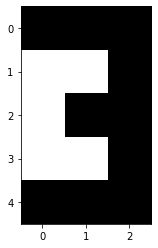

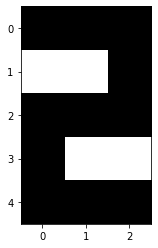

In [5]:
#Display 0011 correspondiente a 3
display(0,0,1,1)

#Display 0010 correspondiente a 2
display(0,0,1,0)

Finalmente, podemos ver como se visualizan cada uno de los 9 digitos.

0000


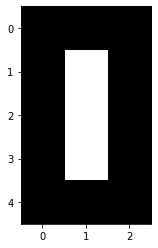

0001


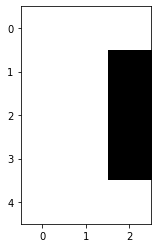

0010


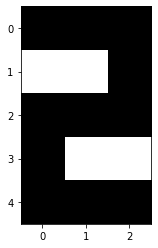

0011


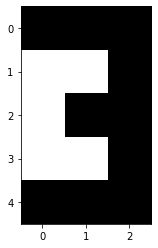

0100


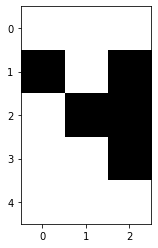

0101


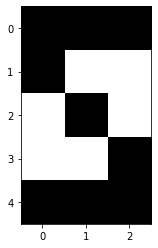

0110


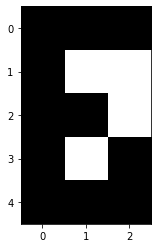

0111


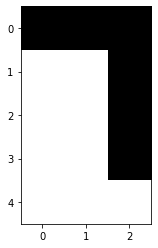

1000


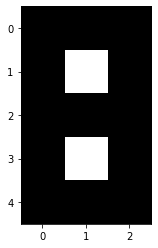

1001


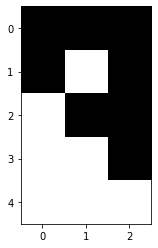

In [6]:
for i in range(10):
    #Se genera una cadena binaria por cada digito de 0 a 9
    binary_digit = '{:0{}b}'.format(i, 4)
    #Imprime el digito binario
    print(binary_digit)
    #Aplica el display a la cadena binaria.
    display(int(binary_digit[0]),int(binary_digit[1]), int(binary_digit[2]), int(binary_digit[3]))